In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1

In [6]:
data.corr()['Outcome']

Pregnancies      0.221898
Glucose          0.466581
BloodPressure    0.065068
SkinThickness    0.074752
Insulin          0.130548
BMI              0.292695
Pedigree         0.173844
Age              0.238356
Outcome          1.000000
Name: Outcome, dtype: float64

<AxesSubplot: >

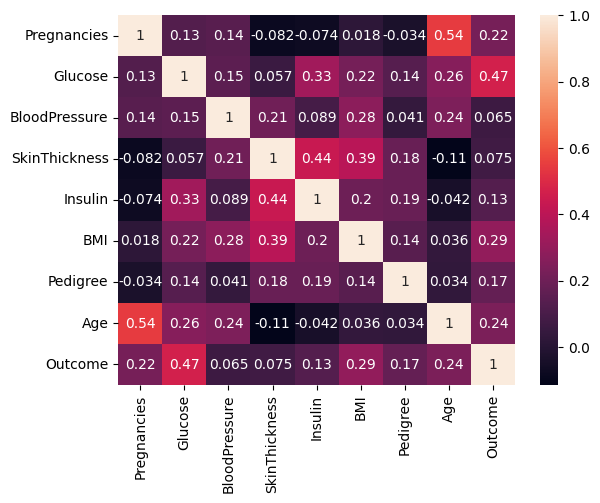

In [8]:
sns.heatmap(data.corr(),annot=True)

In [9]:
X = data.drop('Outcome', axis=1)

In [10]:
y = data['Outcome']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
scaler = StandardScaler()

In [16]:
knn = KNeighborsClassifier()

In [17]:
operations = [('scaler', scaler), ('knn', knn)]

In [18]:
from sklearn.pipeline import Pipeline

In [19]:
pipe = Pipeline(operations)

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
k_values = list(range(1, 20))

In [22]:
param_grid = {'knn__n_neighbors':k_values}

In [23]:
full_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
full_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=7))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=7),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 7,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [34]:
y_pred = knn.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [35]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [29]:
confusion_matrix(y_test, y_pred)

array([[121,  30],
       [ 40,  40]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       151
           1       0.57      0.50      0.53        80

    accuracy                           0.70       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



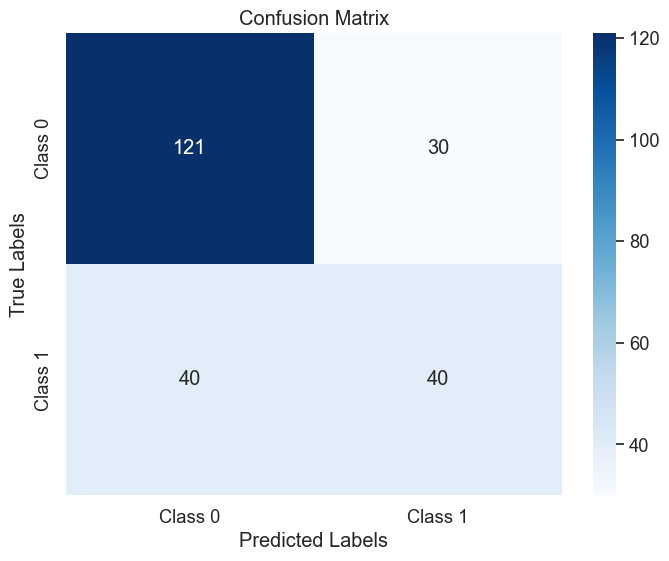

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example true labels and predicted labels (replace these with your actual data)
true_labels = y_test
predicted_labels =y_pred 

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (if applicable)
class_labels = ['Class 0', 'Class 1']

# Plot confusion matrix using matplotlib
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


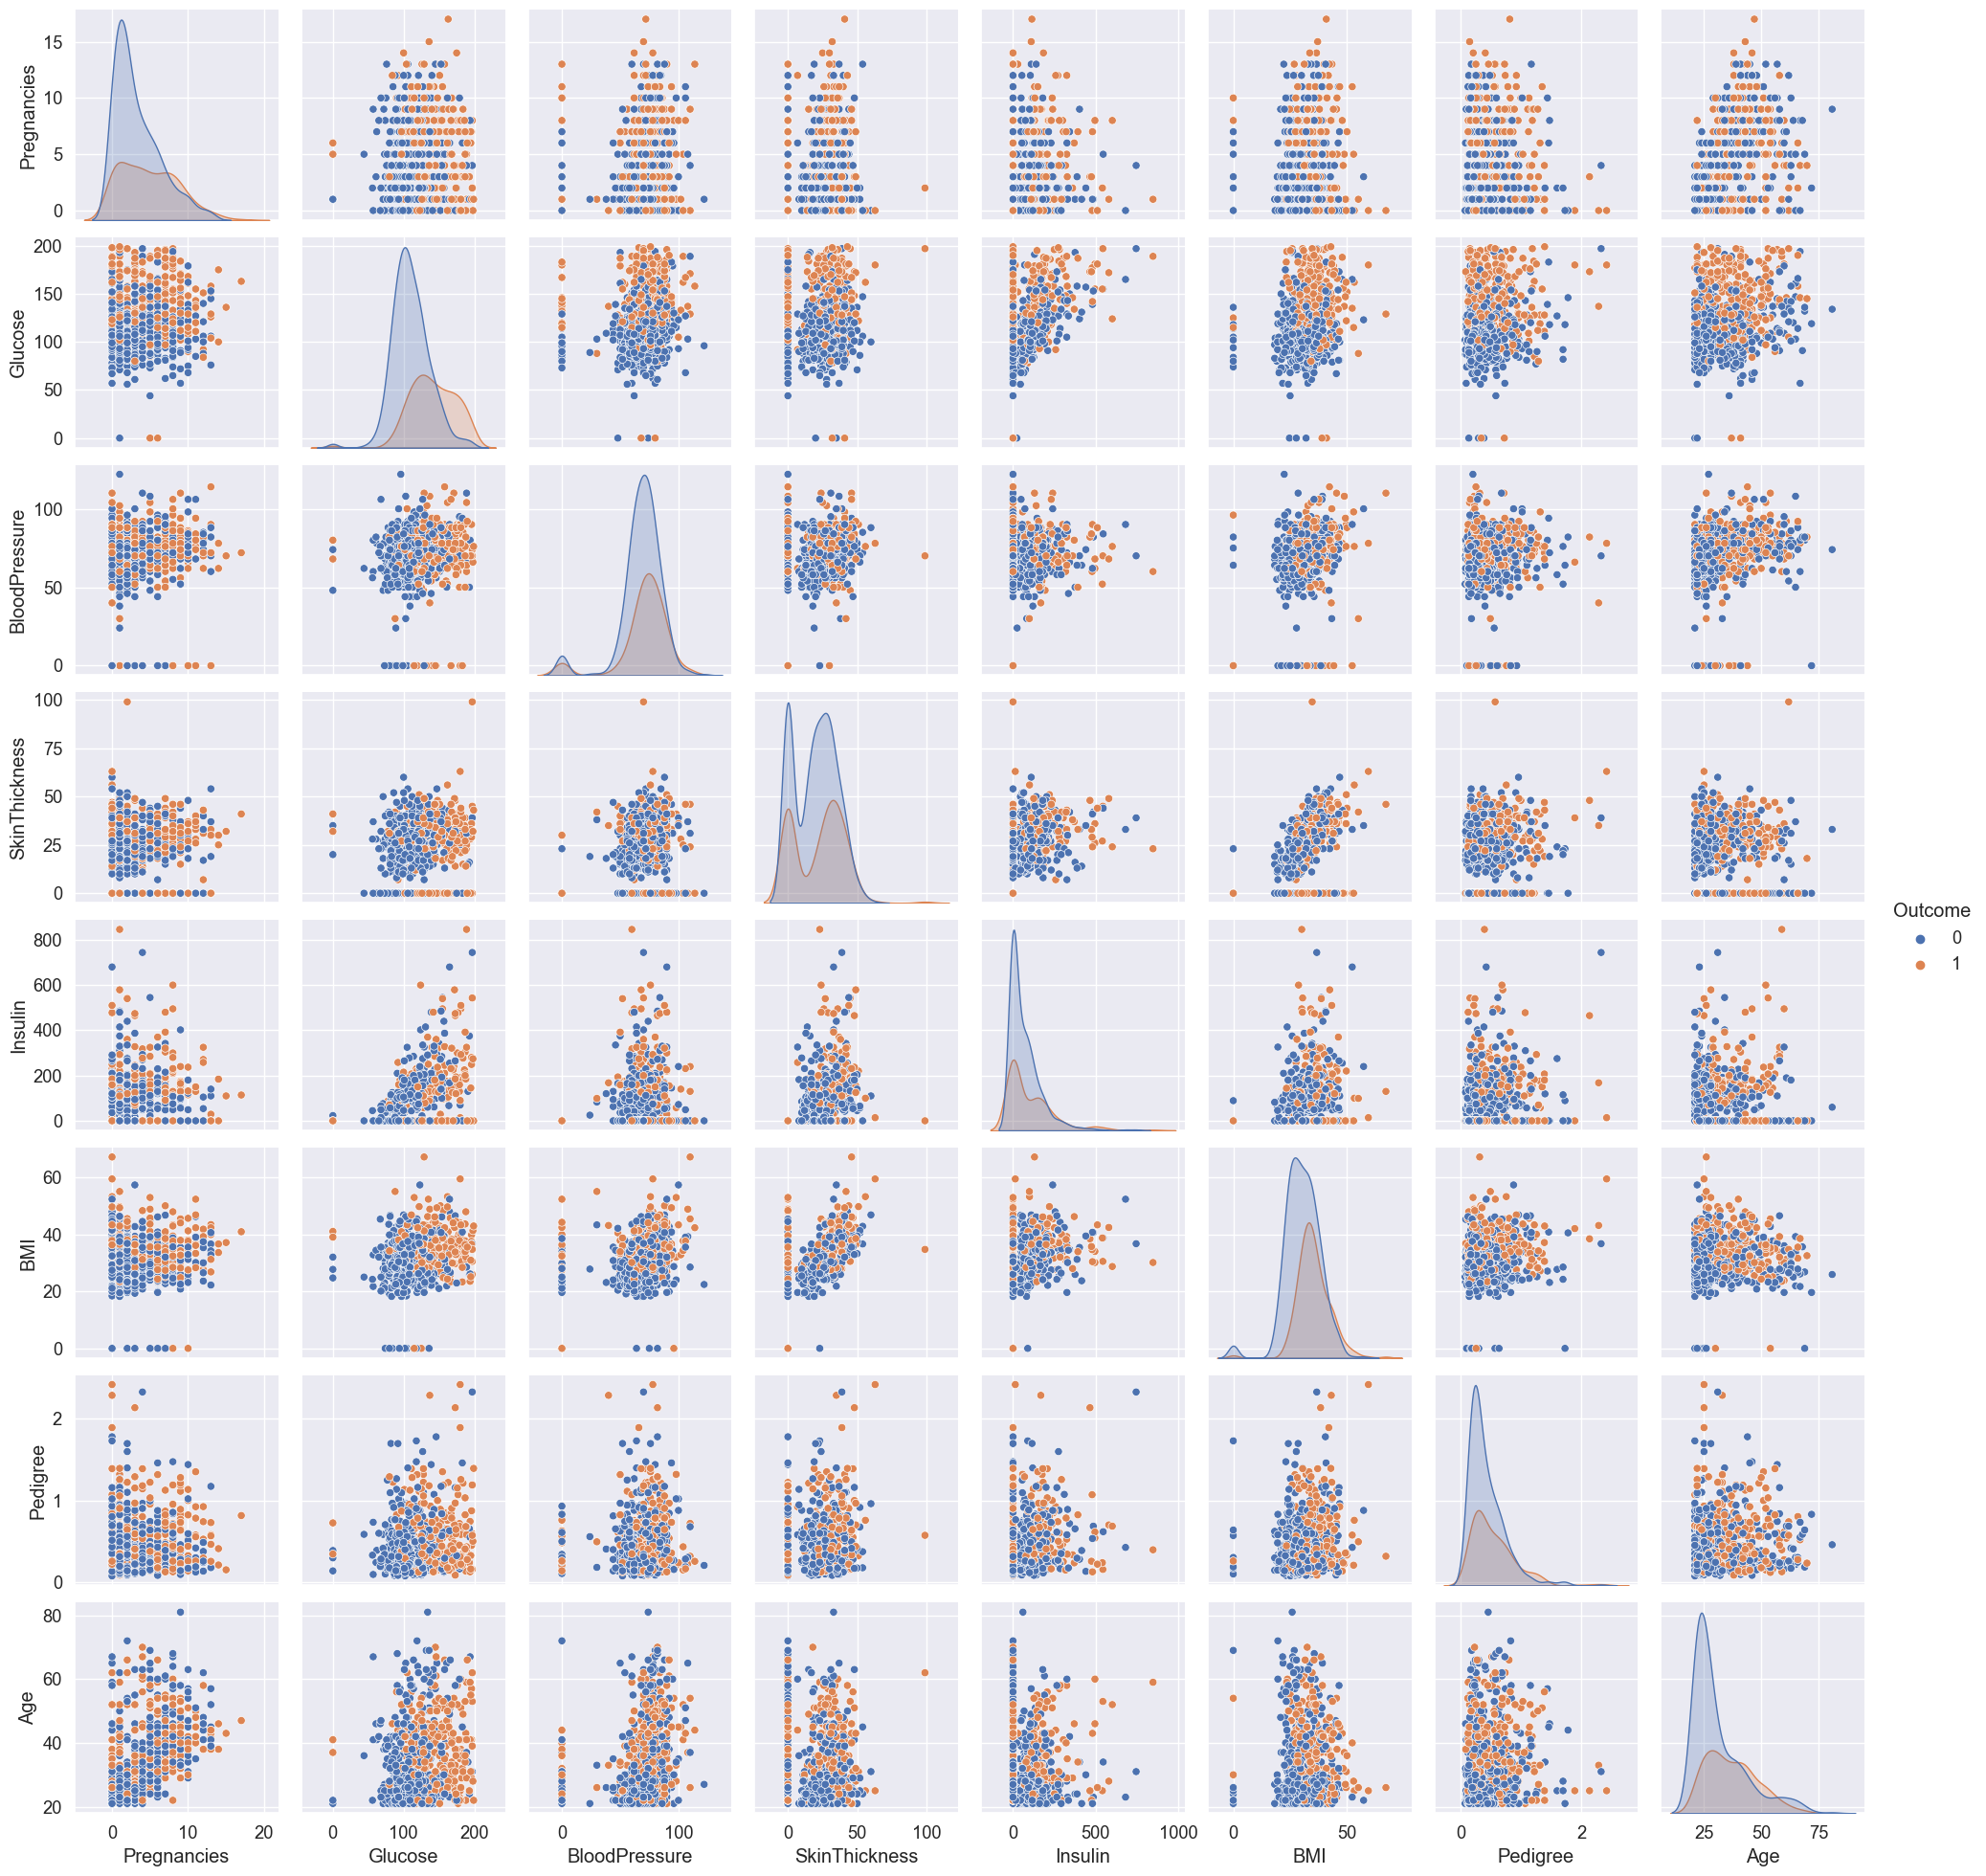

In [38]:
p=sns.pairplot(data, hue = 'Outcome')